# Interactive Turing Machine Visualization

This notebook demonstrates the interactive visualization API that mirrors the JavaScript/WASM interface.
Unlike `PngDataIterator` which requires pre-specified frame steps, `SpaceByTimeMachine` can run indefinitely
and be stopped at any time with Ctrl+C (or the stop button in VS Code).

In [2]:
from busy_beaver_blaze import SpaceByTimeMachine, BB5_CHAMP, BB6_CONTENDER  # noqa: F401
from busy_beaver_blaze.interactive import visualize_live

## Example 1: BB5 Champion with Early Stop

Run the BB5 champion machine up to 100,000 steps with live updates.

Step 100,000 | Nonblanks: 394 | BB5 Champion


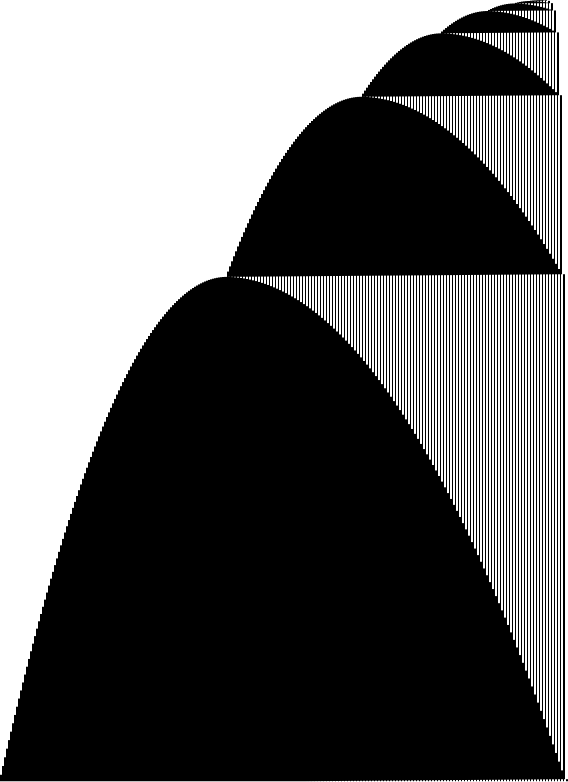


✓ Reached early_stop at step 100,000


In [3]:
# Create machine (smaller resolution for faster rendering)
machine = SpaceByTimeMachine(
    program=BB5_CHAMP,
    resolution=(800, 600),
    binning=True,
    skip=0
)

# Visualize with early stop
visualize_live(
    machine,
    run_for_secs=0.05,      # Step for 50ms before each render
    early_stop=100_000,      # Stop at 100k steps
    caption="BB5 Champion"
)

## Example 2: Indefinite Running (Stop with Ctrl+C)

Run without an early_stop limit. Use the stop button or Ctrl+C to interrupt.

Step 47,176,870 | Nonblanks: 4,098 | BB5 - Click Stop to Halt [HALTED]


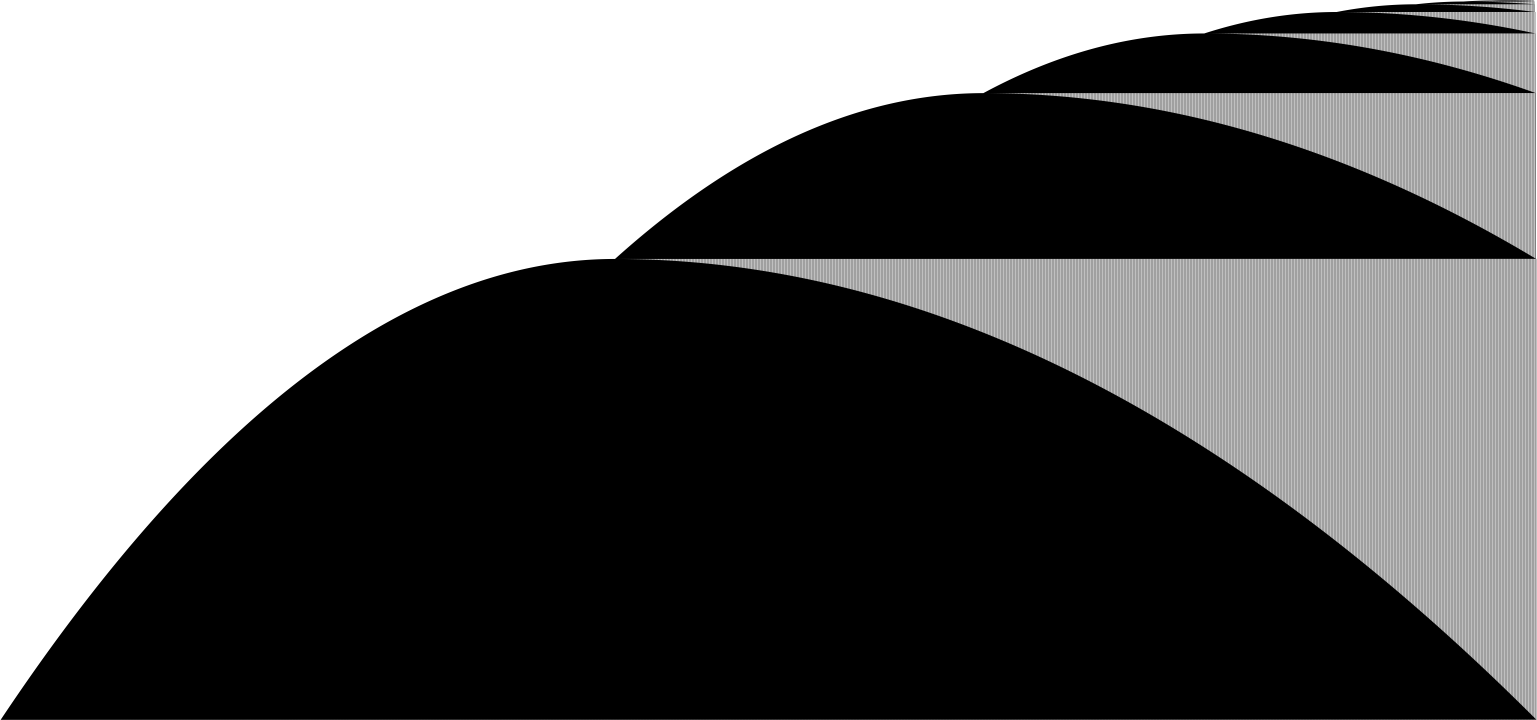


✓ Halted at step 47,176,870


In [4]:
# Create fresh machine
machine = SpaceByTimeMachine(
    program=BB5_CHAMP,
    resolution=(800, 600),
    binning=True
)

# Run indefinitely - click stop button or press Ctrl+C to halt
visualize_live(
    machine,
    run_for_secs=0.1,
    early_stop=None,         # No limit!
    caption="BB5 - Click Stop to Halt"
)

## Example 3: Custom Colors

Create a machine with custom color palette.

Step 50,000 | Nonblanks: 329 | BB5 with Custom Colors


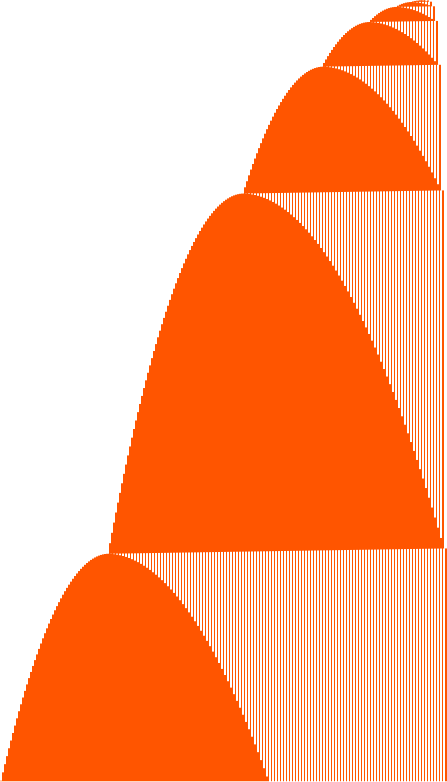


✓ Reached early_stop at step 50,000


In [5]:
# Create machine with custom colors
machine = SpaceByTimeMachine(
    program=BB5_CHAMP,
    resolution=(800, 600),
    binning=True,
    colors=["#FFFFFF", "#FF5500", "#FFFF00", "#FF00FF", "#00FFFF"]  # White, orange, yellow, magenta, cyan
)

visualize_live(
    machine,
    run_for_secs=0.1,
    early_stop=50_000,
    caption="BB5 with Custom Colors"
)

## Example 4: Manual Control Loop

For more control, use the LiveVisualizer directly or write your own loop.

In [ ]:
from IPython.display import display, Image, clear_output

# Create machine
machine = SpaceByTimeMachine(
    program=BB5_CHAMP,
    resolution=(640, 480),
    binning=True
)

# Custom loop with custom stopping condition
try:
    while True:
        # Step for a bit
        can_continue = machine.step_for_secs(0.05, early_stop=None, loops_per_check=10_000)
        
        # Render and display
        clear_output(wait=True)
        png_bytes = machine.to_png()
        print(f"Step: {machine.step_count():,} | Nonblanks: {machine.count_nonblanks():,}")
        display(Image(data=png_bytes, format='png'))
        
        # Custom stop condition: stop when nonblanks > 5000
        if machine.count_nonblanks() > 5000:
            print("\n✓ Stopped: nonblanks exceeded 5000")
            break
        
        if not can_continue:
            print("\n✓ Machine halted")
            break
            
except KeyboardInterrupt:
    print("\n⏹ Interrupted by user")

## Example 5: Dynamic Recoloring

Change colors while the machine is running.

In [ ]:
# Create machine and run it to a specific point
machine = SpaceByTimeMachine(
    program=BB5_CHAMP,
    resolution=(800, 600),
    binning=True
)

# Run to 10k steps
machine.step_for_secs(10.0, early_stop=10_000)
print(f"Reached step {machine.step_count():,}")

# Show with default colors
from IPython.display import display, Image
png = machine.to_png()
display(Image(data=png, format='png'))

In [ ]:
# Change colors and re-render (same step count)
machine.set_colors(["#000000", "#FF0000", "#00FF00", "#0000FF", "#FFFF00"])
png = machine.to_png()
display(Image(data=png, format='png'))
print(f"Same step ({machine.step_count():,}), different colors!")

## Summary

The `SpaceByTimeMachine` API provides:

- **No predetermined endpoint**: Run indefinitely until halted or stopped by user
- **Live rendering**: Get PNG at any point without pre-planning frame steps
- **Dynamic recoloring**: Change palette without recomputing
- **Mirrors JavaScript API**: Same workflow as web interface
- **Interruptible**: Ctrl+C / stop button works gracefully

This complements `PngDataIterator` which is better for:
- Batch processing with known frame list
- Multi-threaded parallel generation
- Creating movie files with many frames